In [1]:
import pandas as pd
df = pd.read_excel(r'C:\Users\halit.erdogan\Downloads\census-train.xlsx')
df_test = pd.read_excel(r'C:\Users\halit.erdogan\Downloads\census-test.xlsx')

In [2]:
df.columns = df.iloc[0,:]
df_test.columns = df_test.iloc[0,:]

In [3]:
df = df.iloc[1: , :]
df_test = df_test.iloc[1: , :]

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df['workclass'])
workclass_num = le.transform(df['workclass']).tolist()
workclass_num_test = le.transform(df_test['workclass']).tolist()


le.fit(df['marital-status'])
marital_num = le.transform(df['marital-status']).tolist()
marital_num_test = le.transform(df_test['marital-status']).tolist()


le.fit(df['occupation'])
occupation_num = le.transform(df['occupation']).tolist()
occupation_num_test = le.transform(df_test['occupation']).tolist()


le.fit(df['relationship'])
relationship_num = le.transform(df['relationship']).tolist()
relationship_num_test = le.transform(df_test['relationship']).tolist()


le.fit(df['race'])
race_num = le.transform(df['race']).tolist()
race_num_test = le.transform(df_test['race']).tolist()


le.fit(df['sex'])
sex_num = le.transform(df['sex']).tolist()
sex_num_test = le.transform(df_test['sex']).tolist()

le.fit(df['native-country'])
country_num = le.transform(df['native-country']).tolist()
country_num_test = le.transform(df_test['native-country']).tolist()


le.fit(df['label'])
label_num = le.transform(df['label']).tolist()
label_num_test = le.transform(df_test['label']).tolist()


ValueError: y contains previously unseen labels: '<=50K.'

In [5]:
df_test['label'].value_counts()

<=50K.    12435
>50K.      3846
Name: label, dtype: int64

In [6]:
for i in range(1,len(df_test['label'])+1):
    if '<' in df_test['label'][i]:
        df_test['label'][i] = df_test['label'][i][0:5]
        #print(cell)
    else:
        df_test['label'][i] = df_test['label'][i][0:4]

In [7]:
df_test['label'].value_counts()

<=50K    12435
>50K      3846
Name: label, dtype: int64

In [8]:
label_num_test = le.transform(df_test['label']).tolist()

In [9]:
df['workclass'] = workclass_num
df['marital-status'] = marital_num
df['occupation'] = occupation_num
df['relationship'] = relationship_num
df['race'] = race_num
df['sex'] = sex_num
df['native_country'] = country_num
df['label'] = label_num

In [10]:
df = df.drop('native-country', 1)

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14024/2972205855.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('native-country', 1)


In [11]:
df = df.drop('education', 1)

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14024/3333381138.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('education', 1)


In [12]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,label,native_country
1,39,7,77516,13,4,1,1,4,1,2174,0,40,0,39
2,50,6,83311,13,2,4,0,4,1,0,0,13,0,39
3,38,4,215646,9,0,6,1,4,1,0,0,40,0,39
4,53,4,234721,7,2,6,0,2,1,0,0,40,0,39
5,28,4,338409,13,2,10,5,2,0,0,0,40,0,5


In [13]:
df_test['workclass'] = workclass_num_test
df_test['marital-status'] = marital_num_test
df_test['occupation'] = occupation_num_test
df_test['relationship'] = relationship_num_test
df_test['race'] = race_num_test
df_test['sex'] = sex_num_test
df_test['native_country'] = country_num_test
df_test['label'] = label_num_test

In [14]:
df_test = df_test.drop('native-country', 1)
df_test = df_test.drop('education', 1)

C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14024/2872778953.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop('native-country', 1)
C:\Users\HALIT~1.ERD\AppData\Local\Temp/ipykernel_14024/2872778953.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop('education', 1)


In [15]:
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,label,native_country
1,25,4,226802,7,4,7,3,2,1,0,0,40,0,39
2,38,4,89814,9,2,5,0,4,1,0,0,50,0,39
3,28,2,336951,12,2,11,0,4,1,0,0,40,1,39
4,44,4,160323,10,2,7,0,2,1,7688,0,40,1,39
5,18,0,103497,10,4,0,3,4,0,0,0,30,0,39


In [16]:
from sklearn.linear_model import LogisticRegression

x_train = df.loc[:, df.columns != 'label']
y_train = df['label']

In [42]:
from sklearn import preprocessing

logisticRegr = LogisticRegression()

scaler = preprocessing.StandardScaler().fit(x_train)
X_scaled = scaler.transform(x_train)


x_trainTemp = x_train[['age','fnlwgt','sex','hours-per-week','capital-gain','capital-loss','race','workclass','occupation','education-num','marital-status','relationship']]
logisticRegr.fit(X_scaled, y_train)

LogisticRegression()

In [43]:
x_test = df_test.loc[:, df.columns != 'label']
x_test_scaled = scaler.transform(x_test)

y_test = df_test['label']

x_testTemp = x_test[['age','fnlwgt','sex','hours-per-week','capital-gain','capital-loss','race','workclass','occupation','education-num','marital-status','relationship']]

predictions = logisticRegr.predict(x_test_scaled)


In [44]:
score = logisticRegr.score(x_test_scaled, y_test)
print(score)

0.8247650635710337


0.850647820042275


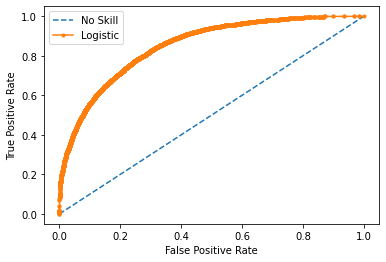

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
#print(ns_probs)
lr_probs = logisticRegr.predict_proba(x_test_scaled)
lr_probs = lr_probs[:, 1]
#print(lr_probs)
#print(predictions)
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print(str(lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()